In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('C:/Users/leo/Desktop/kaggle/regression/diamond/diamond.csv')
data.head() #5*11

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [40]:
data = data.iloc[:,1:]
data.shape

(53940, 10)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [42]:
data.describe()

#可以發現x,y,z有為0的情況，必須把它去除

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [43]:
data = data.drop(data[data['x'] == 0].index)
data = data.drop(data[data['y'] == 0].index)
data = data.drop(data[data['z'] == 0].index)
data.shape #(53920 , 9)

#除去20筆資料

(53920, 10)

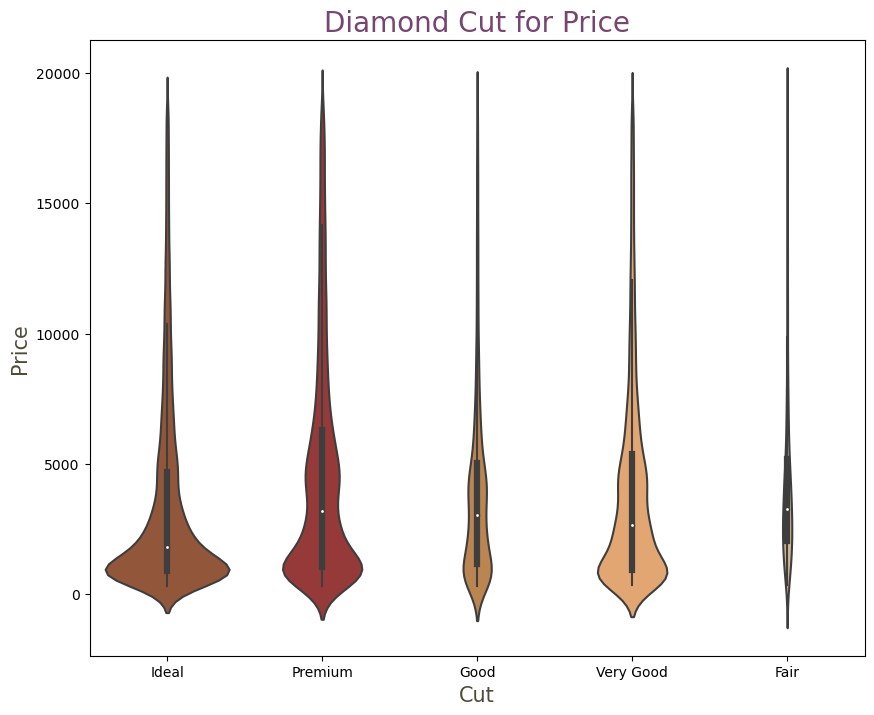

Ideal        21548
Premium      13780
Very Good    12081
Good          4902
Fair          1609
Name: cut, dtype: int64


In [44]:
#繪製分類變量的小提琴圖

plt.figure(figsize=(10,8))
cols = ["#A0522D","#A52A2A","#CD853F","#F4A460","#DEB887"]
ax = sns.violinplot(x="cut",y="price", data=data, palette=cols,scale= "count")
ax.set_title("Diamond Cut for Price", color="#774571", fontsize = 20)
ax.set_ylabel("Price", color="#4e4c39", fontsize = 15)
ax.set_xlabel("Cut", color="#4e4c39", fontsize = 15)
plt.show()

cut_counts = data['cut'].value_counts()
print(cut_counts)

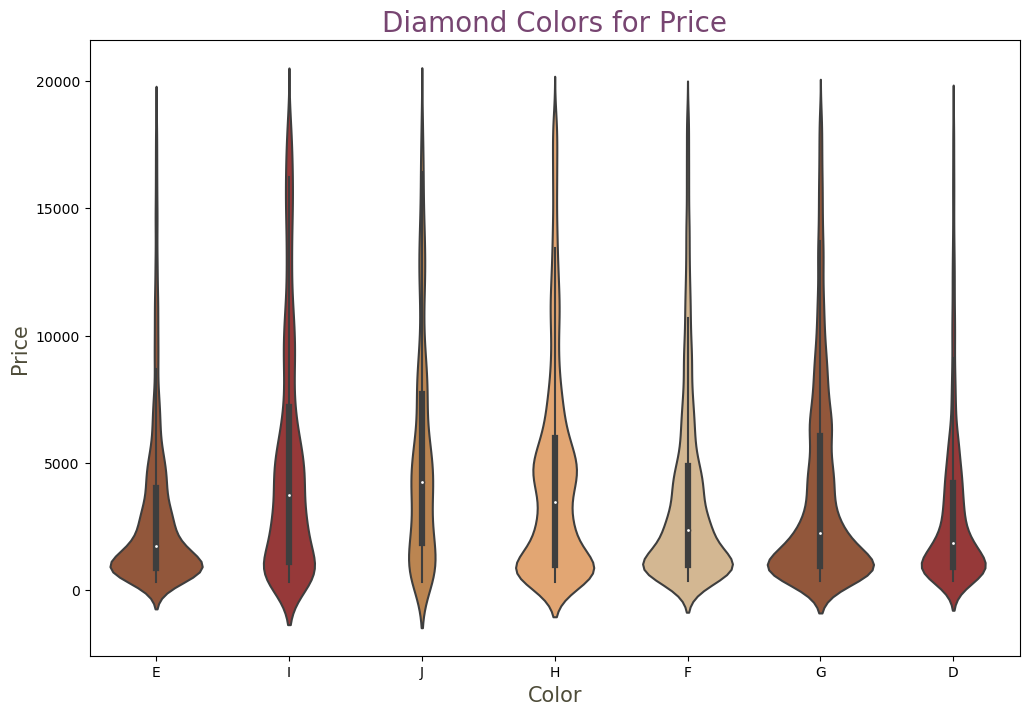

G    11284
E     9797
F     9538
H     8298
D     6774
I     5421
J     2808
Name: color, dtype: int64


In [45]:
plt.figure(figsize=(12,8))
ax = sns.violinplot(x="color",y="price", data=data, palette=cols,scale= "count")
ax.set_title("Diamond Colors for Price", color="#774571", fontsize = 20)
ax.set_ylabel("Price", color="#4e4c39", fontsize = 15)
ax.set_xlabel("Color", color="#4e4c39", fontsize = 15)
plt.show()

color_counts = data['color'].value_counts()
print(color_counts)

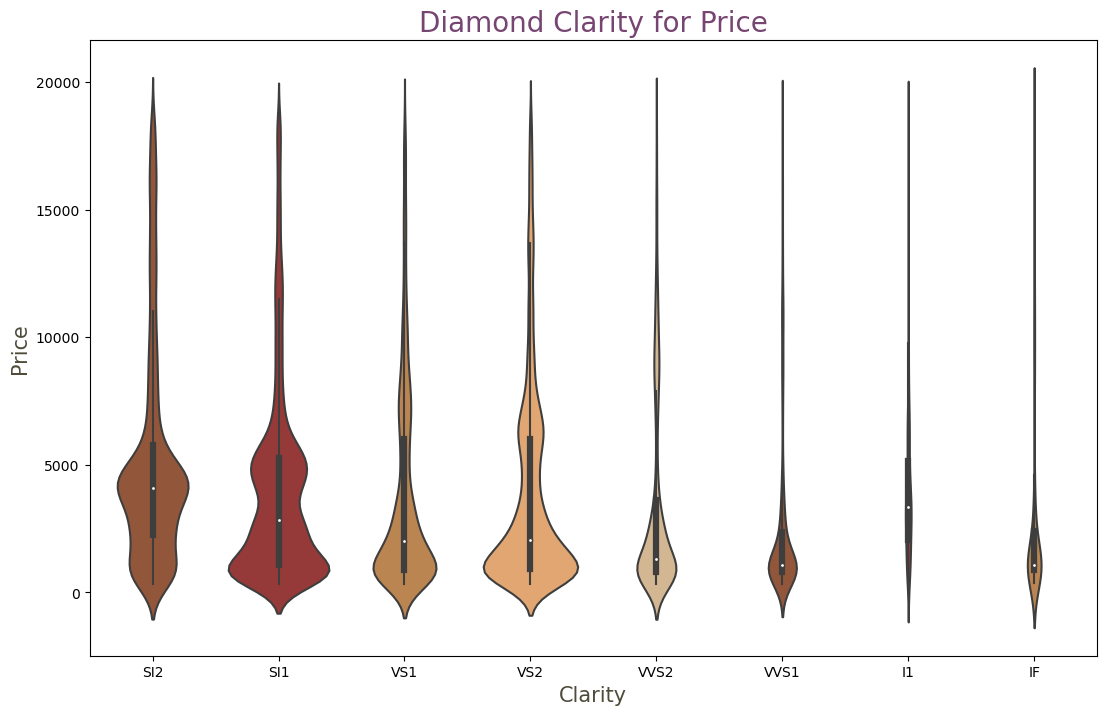

SI1     13063
VS2     12254
SI2      9185
VS1      8170
VVS2     5066
VVS1     3654
IF       1790
I1        738
Name: clarity, dtype: int64


In [46]:
plt.figure(figsize=(13,8))
ax = sns.violinplot(x="clarity",y="price", data=data, palette=cols,scale= "count")
ax.set_title("Diamond Clarity for Price", color="#774571", fontsize = 20)
ax.set_ylabel("Price", color="#4e4c39", fontsize = 15)
ax.set_xlabel("Clarity", color="#4e4c39", fontsize = 15)
plt.show()

clarity_counts = data['clarity'].value_counts()
print(clarity_counts)

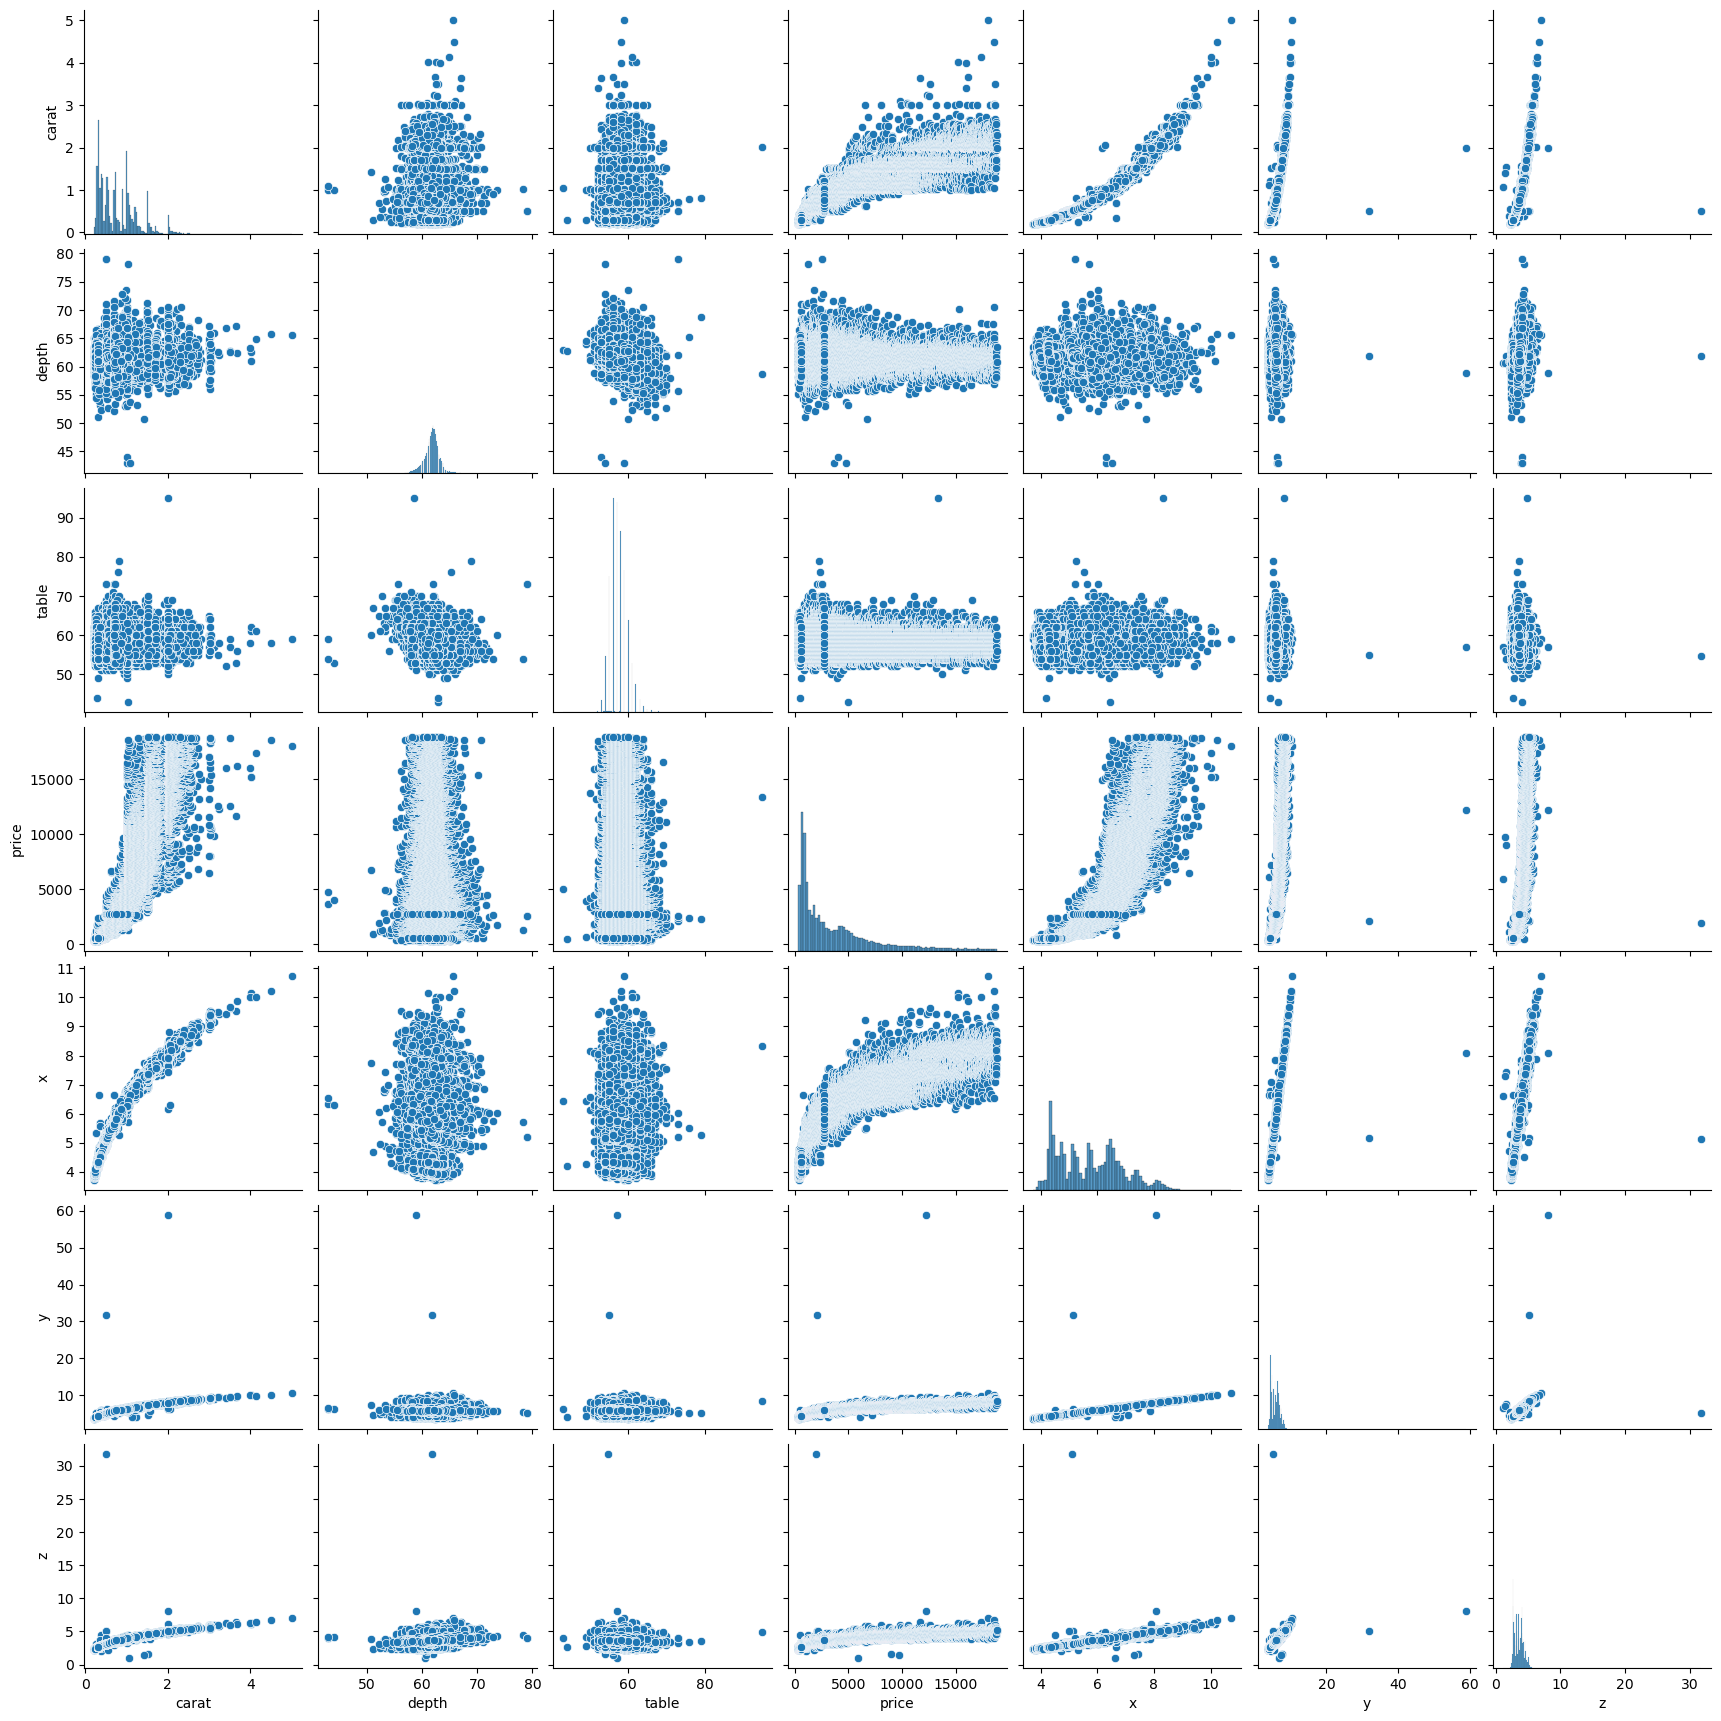

In [49]:
pairplot = sns.pairplot(data)

#根據pairplot可以看出y和z對於price有一些離群值，並且depth和table應該要設定上限

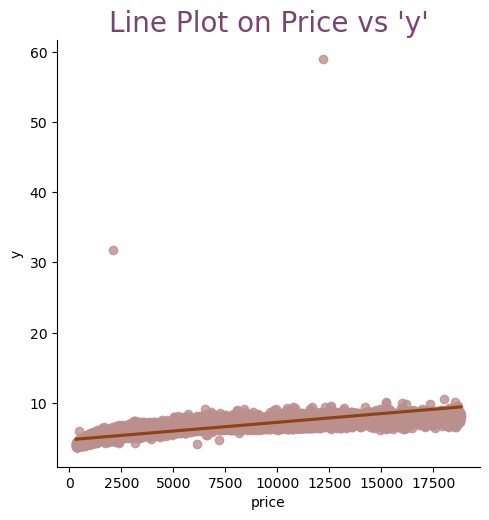

In [51]:
lm = sns.lmplot(x='price',y='y',data=data,
                scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'y'", color="#774571", fontsize = 20)
plt.show()

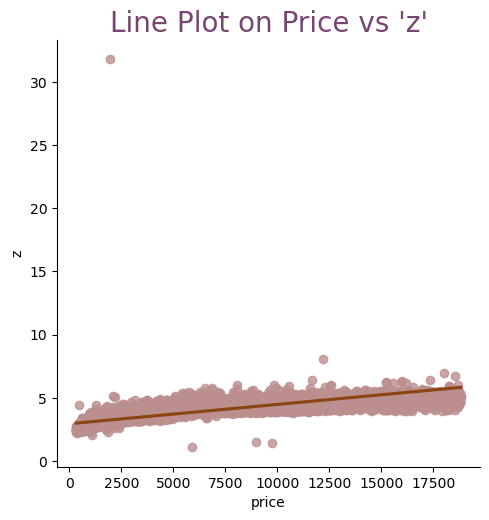

In [52]:
lm = sns.lmplot(x="price", y="z", data=data, 
                scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'z'", color="#774571", fontsize = 20)
plt.show()

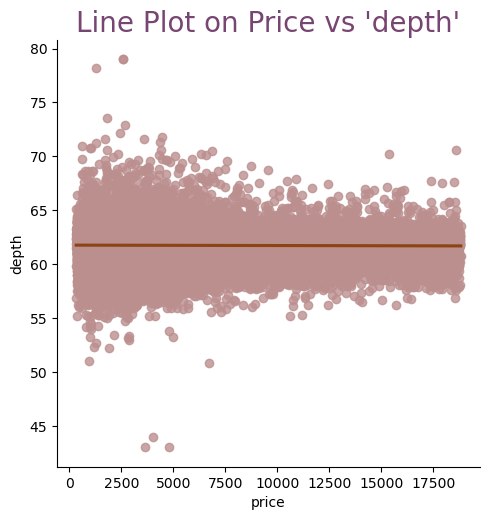

In [53]:
lm = sns.lmplot(x="price", y="depth", data=data, 
                scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'depth'", color="#774571", fontsize = 20)
plt.show()

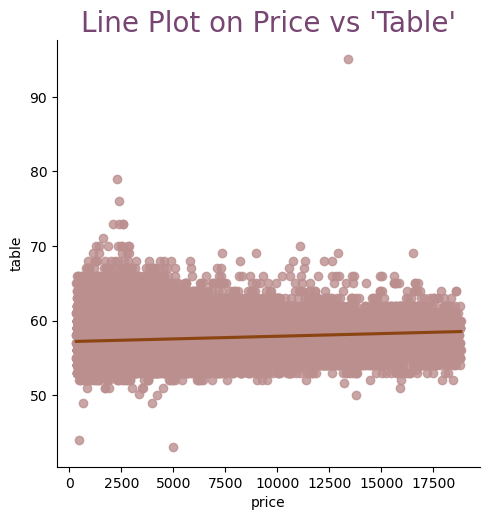

In [54]:
lm = sns.lmplot(x="price", y="table", data=data, 
                scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'Table'", color="#774571", fontsize = 20)
plt.show()

In [55]:
data = data[(data['table']<75) & (data['table']>45)]
data = data[(data['depth']<75) & (data['depth']>45)]
data = data[data['y']<40]
data = data[data['z']<15]
data.shape 
#刪除了13個outlier

(53907, 10)

In [57]:
#將類別轉換為數字
#使用labelEncoder

from sklearn.preprocessing import LabelEncoder
data1 = data.copy()
label_encoder = LabelEncoder()
columns = ['cut','color','clarity']
for i in columns:
    data1[i] = label_encoder.fit_transform(data1[i])

data1.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000
mean,0.797657,2.553416,2.594042,3.835550,61.749467,57.455577,3930.891906,5.731557,5.733889,3.539357
std,0.473780,1.027314,1.701296,1.724587,1.419712,2.221240,3987.315512,1.119412,1.116933,0.691649
min,0.200000,0.000000,0.000000,0.000000,50.800000,49.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,4.000000,6.000000,7.000000,73.600000,73.000000,18823.000000,10.740000,31.800000,6.980000


<Axes: >

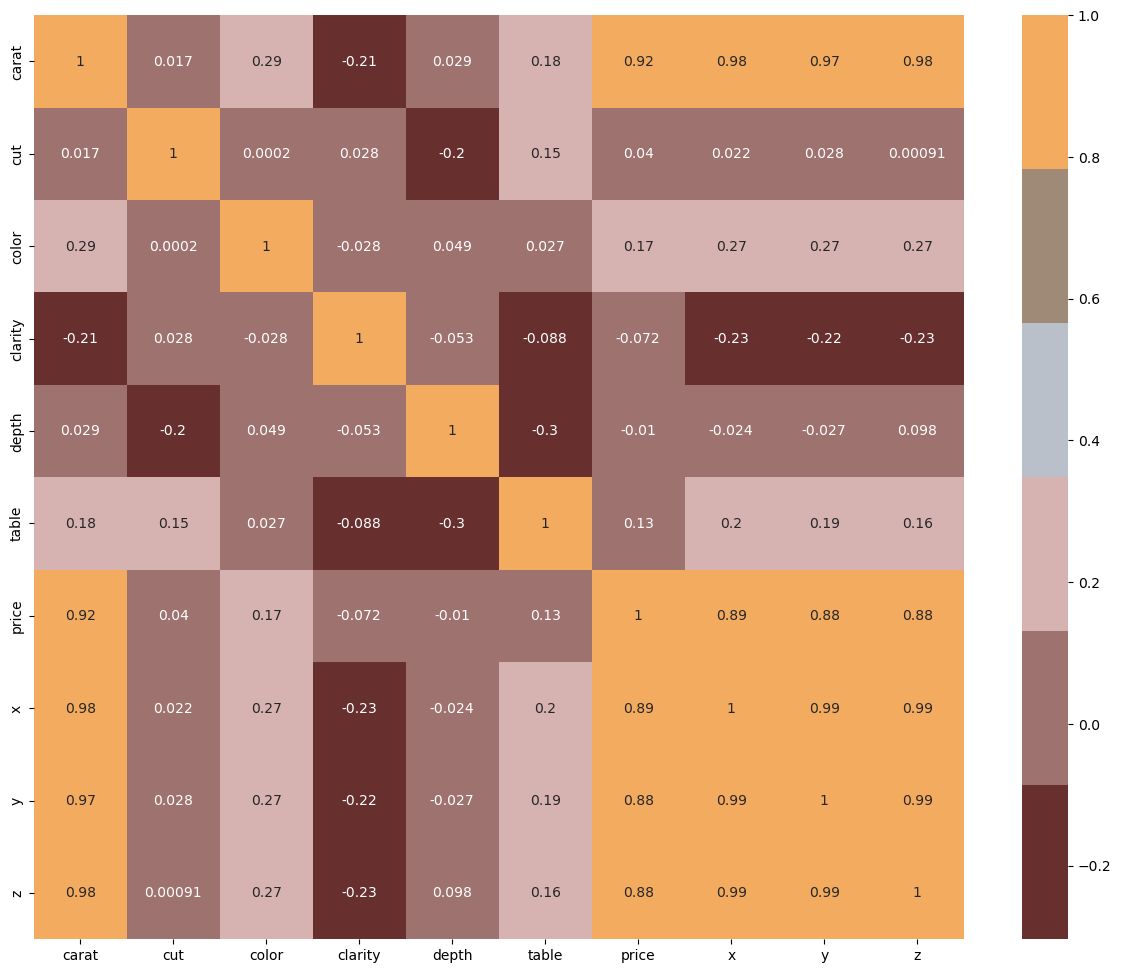

In [58]:
#繪製各特徵間correlation的熱力圖

cmap = sns.diverging_palette(205, 133, 63, as_cmap=True)
#這行程式碼生成了一個散布在兩個主色調之間的色彩映射（colormap）。
#這種調色板通常用於表示正負相關性，色彩的深淺表示相關性的強弱。

cols = (["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
corrmat= data1.corr()
f, ax = plt.subplots(figsize=(15,12))
sns.heatmap(corrmat,cmap=cols,annot=True)

#可以看到'carat'、'x'、'y'、'z'和'price'具有高度相關性，
#不過因為此資料特徵較少所以可以全部都拿來做model

In [70]:
from sklearn.model_selection import train_test_split

x = data1.drop(['price'],axis = 1)
y = data1['price']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = 10)

In [71]:
x_train

,carat,cut,color,clarity,depth,table,x,y,z
12686,1.66,3,5,3,60.0,59.0,7.63,7.56,4.56
14524,1.00,3,2,5,59.9,59.0,6.46,6.42,3.86
37480,0.35,3,3,6,59.3,61.0,4.62,4.58,2.73
31917,0.30,4,3,4,63.1,59.0,4.27,4.25,2.69
19790,1.07,3,0,4,62.0,60.0,6.55,6.49,4.04
...,...,...,...,...,...,...,...,...,...
28040,0.41,0,4,2,65.4,61.0,4.51,4.63,2.99
50524,0.71,4,3,2,63.3,56.0,5.66,5.69,3.59
29222,0.31,3,3,4,60.4,59.0,4.41,4.37,2.65
40085,0.33,2,4,1,61.9,55.0,4.44,4.42,2.74


In [72]:
#使用pipeline將多個ML模型組合成一個整體

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])
pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])
pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])
pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])
pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])

pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}

for pipe in pipelines:
    pipe.fit(x_train, y_train)

In [74]:
#cross validation

from sklearn.model_selection import cross_val_score

cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, x_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -1386.121893 
DecisionTree: -760.072556 
RandomForest: -556.139130 
KNeighbors: -833.480870 
XGBRegressor: -557.241313 


In [77]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

pred = pipeline_xgb.predict(x_test)
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.9818463462988831
Adjusted R^2: 0.9818362378485144
MAE: 278.01165242950793
MSE: 292811.48730327527
RMSE: 541.1205848082988
